

# Project: [No show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
 This dataset collects information from 100k medical appointments in Brazil and is focused on the question
of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
      ● ‘ScheduledDay’ tells us on what day the patient set up their appointment.
      ● ‘Neighborhood’ indicates the location of the hospital.
      ● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
      ● Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’         if they did not show up.


In [46]:
# import statements for all of the packages that we plan to use.

from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. 


In [48]:
# Load data and print out a few lines.

pd.options.display.max_rows = 9999
df= pd.read_csv('KaggleV2-May-2016.csv')
print(df.head(1)) 

      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   

         AppointmentDay  Age    Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62  JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  


In [49]:
# explore the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are some editing we need to perform like the columns name,and some comlum that contain info that we don't need 

In [50]:
# explore the data 
df.shape

(110527, 14)

There are 110527 rows and 14 columns.

In [51]:
#check for non values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There is no null value

In [52]:
#check fo duplicants
df.duplicated().sum()

0

There is no duplicants in the data

In [53]:
#check for unique value
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

there is only 62299 PatientId,we need to check further for any duplicants  we don't need specially with what we really interested in (show,no_show)

In [54]:
df.duplicated(['PatientId','No-show']).sum()

38710

So, as we expected there is 38710 raws we need to get rid of.

In [55]:
# explore the data further
print(df.describe())

          PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       

There something wrong with age column min and max values we need to check it further for min and max

In [56]:
#look more on the age 
wrong_age=df.query('Age<1')
print(wrong_age)

           PatientId  AppointmentID Gender          ScheduledDay  \
59      7.184428e+13        5638545      F  2016-04-29T08:08:43Z   
63      2.366233e+14        5628286      M  2016-04-27T10:46:12Z   
64      1.885174e+14        5616082      M  2016-04-25T13:28:21Z   
65      2.718818e+14        5628321      M  2016-04-27T10:48:50Z   
67      8.647128e+13        5639264      F  2016-04-29T08:53:02Z   
89      4.314932e+14        5640380      M  2016-04-29T10:37:02Z   
101     6.822847e+13        5642813      M  2016-04-29T17:24:19Z   
104     3.326985e+12        5632495      F  2016-04-28T08:04:48Z   
132     8.468587e+14        5560742      M  2016-04-08T09:29:23Z   
150     5.392419e+10        5641476      M  2016-04-29T13:43:34Z   
188     1.883366e+14        5640933      M  2016-04-29T11:44:49Z   
192     1.165338e+12        5640561      M  2016-04-29T10:57:14Z   
193     2.379698e+11        5532452      F  2016-03-31T11:14:57Z   
194     4.442538e+11        5539566      M  2016

There are 3540 rows of data that contain zero of age .we need to take action.


### Data Cleaning
> now its time for some cleaning.
 

In [57]:
# first we need to delete the wrong ages to make the data more precies
wrong_age=wrong_age.index
df.drop(wrong_age,inplace=True)

In [58]:
#make sure that data had been deleted
df.shape

(106987, 14)

Ok, the rows has reduced by the same rows we removed 

In [59]:
#make sure that data had been deleted
print(df.describe())

          PatientId  AppointmentID            Age    Scholarship  \
count  1.069870e+05   1.069870e+05  106987.000000  106987.000000   
mean   1.472814e+14   5.675434e+06      38.316085       0.101031   
std    2.558267e+14   7.133274e+04      22.466214       0.301371   
min    3.921784e+04   5.030230e+06       1.000000       0.000000   
25%    4.173523e+12   5.640490e+06      19.000000       0.000000   
50%    3.172463e+13   5.680744e+06      38.000000       0.000000   
75%    9.433600e+13   5.725634e+06      56.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  106987.000000  106987.000000  106987.000000  106987.000000   
mean        0.203772       0.074243       0.031406       0.022975   
std         0.402804       0.262167       0.174412       0.164115   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       

Ok, that makes sense.

In [60]:
#rename the colulms

df.rename(columns={'Hipertension':'Hypertension'},inplace=True)
df.rename(columns={'No-show':'No_show'},inplace=True)

print(df.head(1))

      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   

         AppointmentDay  Age    Neighbourhood  Scholarship  Hypertension  \
0  2016-04-29T00:00:00Z   62  JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No_show  
0         0           0        0             0      No  


In [61]:
#remove duplicants id with show or no_show there are 38710 exist
df.drop_duplicates(['PatientId','No_show'],inplace =True)
#check
df.shape

(69454, 14)

In [62]:
#drop any unnecessary data
df.drop(['PatientId','AppointmentID','ScheduledDay'],axis=1,inplace =True)
print(df.head(1))

  Gender        AppointmentDay  Age    Neighbourhood  Scholarship  \
0      F  2016-04-29T00:00:00Z   62  JARDIM DA PENHA            0   

   Hypertension  Diabetes  Alcoholism  Handcap  SMS_received No_show  
0             1         0           0        0             0      No  


In [63]:
#convert the string of the AppointmentDay into data fromat so we can extract the days
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df.dtypes

Gender                    object
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hypertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No_show                   object
dtype: object

In [64]:
#add another columns with day of appointment
df['Appointment_day'] = df['AppointmentDay'].dt.day_name()
df.columns

Index(['Gender', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship',
       'Hypertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received',
       'No_show', 'Appointment_day'],
      dtype='object')

In [66]:
#then drop AppointmentDay column
#df.drop(['AppointmentDay'],axis=1,inplace =True)
print(df.head(1))

  Gender  Age    Neighbourhood  Scholarship  Hypertension  Diabetes  \
0      F   62  JARDIM DA PENHA            0             1         0   

   Alcoholism  Handcap  SMS_received No_show Appointment_day  
0           0        0             0      No          Friday  


<a id='eda'></a>
## Exploratory Data Analysis

>  Now we are ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions. 


overall overview

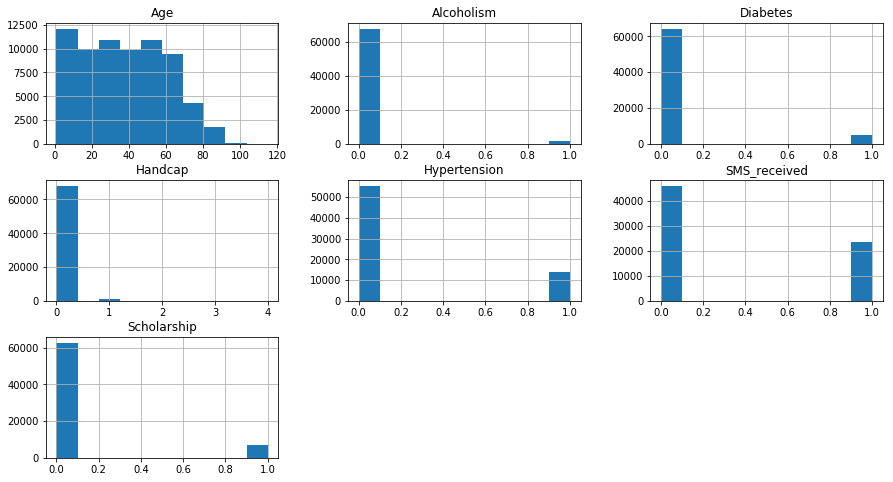

In [67]:
#we draw some histograms for all factors 
df.hist(figsize=(15,8));

The majorty of the ages between 1 and 60,most patient are not Alcoholist ,the majorty don't have diabetes ,handcap,hypertension,most of the patient didn't recive SMS and scholarship.

In [70]:
#the independent parameter here is the showing and not showin

print(df.groupby('No_show').count())

         Gender    Age  Neighbourhood  Scholarship  Hypertension  Diabetes  \
No_show                                                                      
No        52360  52360          52360        52360         52360     52360   
Yes       17094  17094          17094        17094         17094     17094   

         Alcoholism  Handcap  SMS_received  Appointment_day  
No_show                                                      
No            52360    52360         52360            52360  
Yes           17094    17094         17094            17094  


In [71]:
#create two data frame according to showing and not showing
df_showing=df.No_show=="No"
df_not_showing=df.No_show=="Yes"


In [25]:
#create two columns showing and not showing

df['showing'] = df.No_show=="No"
df['NotShowing'] = df.No_show=="Yes"
df.head(1)

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Appointment_day,showing,NotShowing
0,F,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,True,False


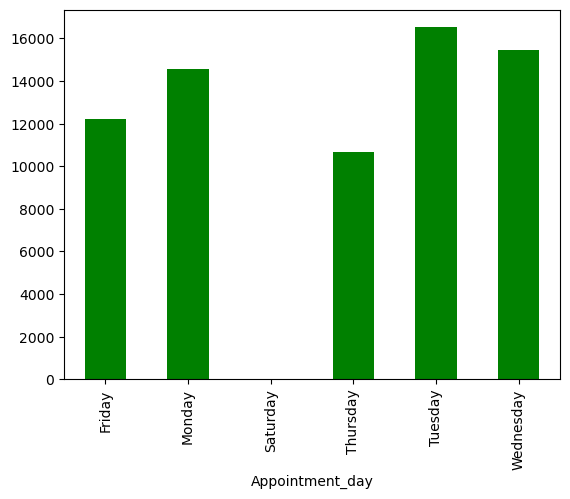

In [146]:
df.groupby('Appointment_day').count()['showing'].plot(kind='bar',label='showing',color='green');

You can see from graph that attendence affected by the day but not so much ,you can see that most patient go on Tuesday then wednessday ,monday ,friday,Thursday

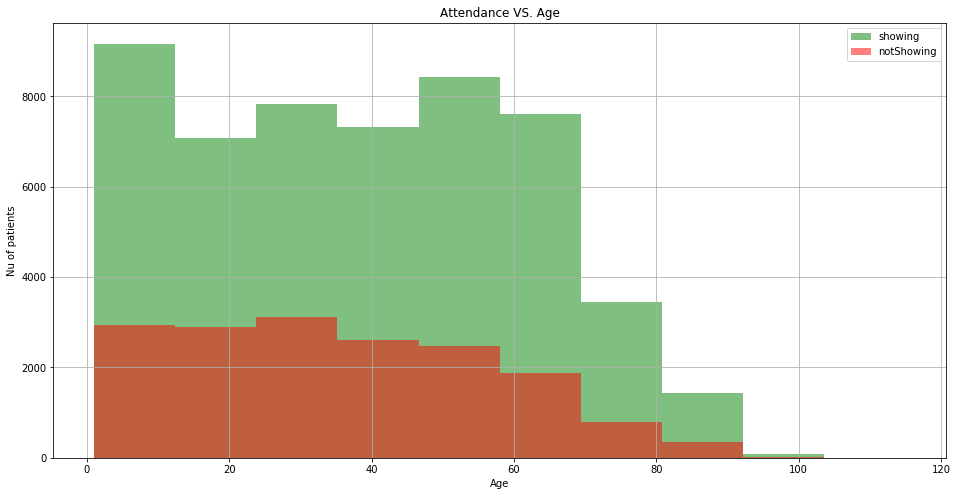

In [26]:
#does age affect showing up

def attend(df,col_name,attended,absent):
    
    plt.figure(figsize=[16,8])
    df[col_name][df_showing].hist(bins=10,label='showing',color='green',alpha=.5)
    df[col_name][df_not_showing].hist(bins=10,label='notShowing',color='red',alpha=.5)
    plt.legend();
    plt.title('Attendance VS. Age')
    plt.xlabel('Age')
    plt.ylabel('Nu of patients');
attend(df,'Age',df_showing,df_not_showing)

the most showing ages between 48 to 58 years old, then from 1 to 12 then the curve start to dicline. 

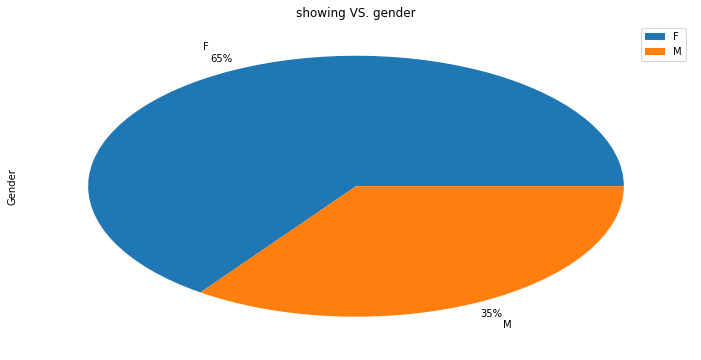

In [27]:
#does gender affect showing up

def attend(df,col_name,attended,absent):
    
    plt.figure(figsize=[12,6])
    df[col_name][df_showing].value_counts(normalize=True).plot(kind='pie',autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
 
    plt.legend();
    plt.title('showing VS. gender');
    
attend(df,'Gender',df_showing,df_not_showing)

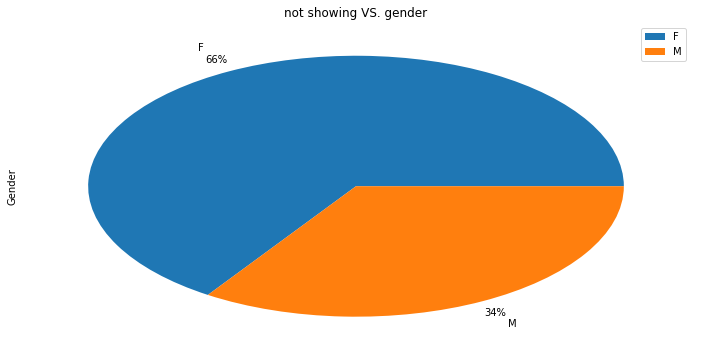

In [28]:
#does gender affect  not showing up
def attend(df,col_name,attended,absent):
    
    plt.figure(figsize=[12,6])
    df[col_name][df_not_showing].value_counts(normalize=True).plot(kind='pie',autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
    plt.legend();
    plt.title('not showing VS. gender');
   
attend(df,'Gender',df_showing,df_not_showing)

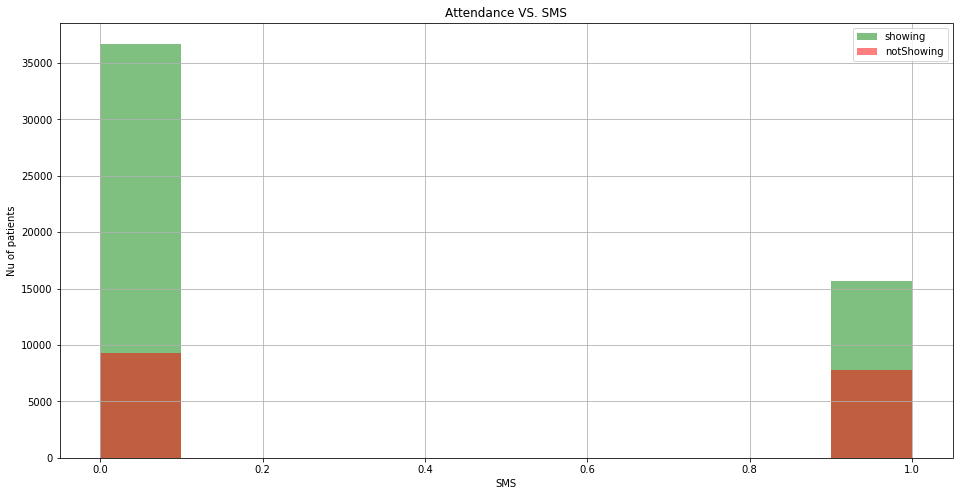

In [29]:
#Does reciving sms affect attendaence

def attend(df,col_name,attended,absent):
    
    plt.figure(figsize=[16,8])
    df[col_name][df_showing].hist(bins=10,label='showing',color='green',alpha=.5)
    df[col_name][df_not_showing].hist(bins=10,label='notShowing',color='red',alpha=.5)
    plt.legend();
    plt.title('Attendance VS. SMS')
    plt.xlabel('SMS')
    plt.ylabel('Nu of patients');
attend(df,'SMS_received',df_showing,df_not_showing)

Number of patients showing up without receciving sms is far more than the patients whom recived sms, there something wrong with sms maybe we need to check the marketing compagin 

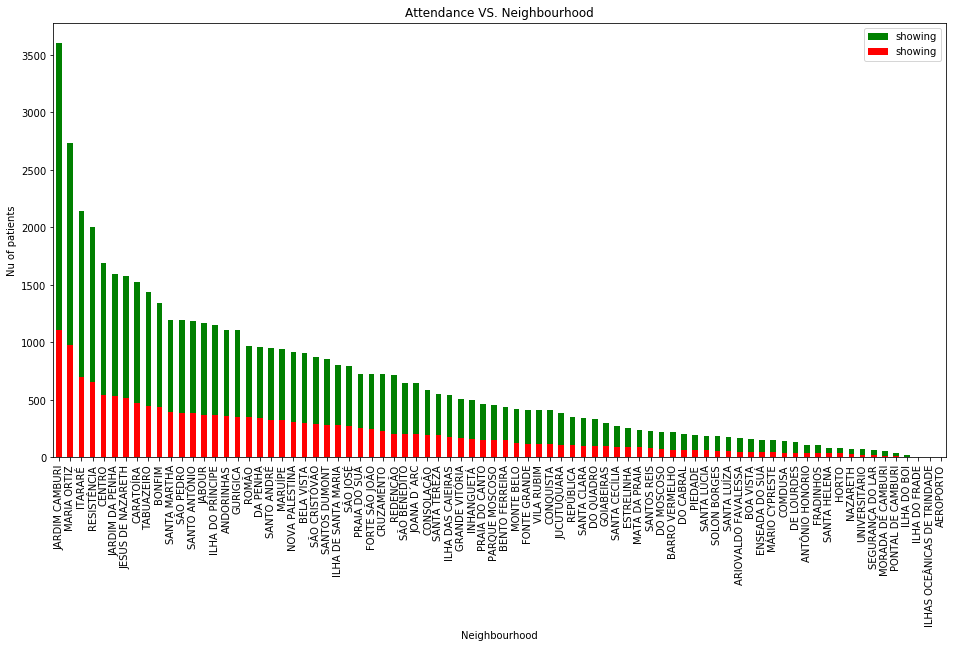

In [30]:
#Does neiberhood affect the attendance 

plt.figure(figsize=[16,8])
df.Neighbourhood[df_showing].value_counts().plot(kind='bar',label='showing',color='green')
df.Neighbourhood[df_not_showing].value_counts().plot(kind='bar',label='showing',color='red')
plt.legend();
plt.title('Attendance VS. Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Nu of patients');


Neighbourhood has a great impact on attendence 

# Conclusion

1- Age has influence on the attendance number,the most showing ages between 48 to 58 years old, then from 1 to 12 then the curve start to dicline. 

2-Number of patients showing up without receciving sms is far more than the patients whom recived sms, there something wrong with sms maybe we need to check the marketing compagin. 

3-Neighbourhood has a great impact on attendence,we need to do something to compensate for that

4-attendence affected by the day but not so much ,you can see that most patient go on Tuesday then wednessday ,monday ,friday,Thursday,maybe we need to focus our compagin to those days that people didn't go like on friday,Thursday

 


# Limitation

couldn't detect any correlation between patients showing and not showing and many characters such as Gender Diabetes 

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

In [ ]:
0